線形回帰

線形回帰スクラッチ

【問題1】仮定関数

In [6]:
# パラメータベクトルは仮でnp.arangeで作成する,そこに本来はパラメータの推定量が入る

def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    Returns
    -------
    y :次の形のndarray, shape (n_samples, 1)
       線形の仮定関数による推定結果
    """
    theta=np.arange(1,len(X)+1)
    theta=theta.reshape(len(X),1)
    y=x@theta

    return y

【問題2】最急降下法

In [74]:
def gradient_descent(X, y, number, gakusyu):
    """
    最急降下法によるパラメータの推定値を求める
    初期値は１で行っている
    それぞれのイテレーション毎の値のリストも返す
    分析が安定するため定数項も入れて行い、定数項入りのリストも変える
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, )
    　訓練データの正解値
    number:　int
    　最急降下法のイテレーション数
    gakusyu: int
    　学習率
     
    Returns
    -------
    theta_pre : 次の形のndarray, shape (n_samples, 1)
                線形の仮定関数の最急降下法によるパラメータの推定値の行列
    list_param:　次の形のndarray, shape (number, 1)   
    
    X_a: 次の形のndarray, shape (n_samples, n_features+1)
         定数項入りの説明変数リスト
    """
    #　定数項を作成
    X1=np.ones(len(X))
    #　定数項を接続
    X2=np.insert(X,0,X1,axis=1)
    X_a=X2
    #　初期値　１で設定
    param=np.ones(X2.shape[1])

    theta_pre=[]
    list_param=[]
    for i in range(number) :
        a1=X2@param-y
        a2=X2.T@a1
        a3=param-(gakusyu*a2)/len(X2)
        theta_pre=a3
        list_param.append(theta_pre)
        param=theta_pre
        
    return theta_pre,X_a,list_param

In [67]:
a,b,c=gradient_descent(setsumei_np,mokuteki_np,10,0.0000002)

【問題3】推定

In [75]:
def predict(X, y, number, gakusyu):
    """
    線形回帰を使い推定する。
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル
    Returns
    -------
    y_pred:次の形のndarray, shape (n_samples, 1)
    　　　  線形回帰による推定結果
    """
    theta_pre,X_a,list_param=gradient_descent(X, y, number, gakusyu)
    theta_pre=theta_pre.reshape(len(theta_pre),1)
    
    y_pred=X_a@theta_pre
    
    return y_pred

【問題4】平均二乗誤差

In [5]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    e_sum=0
    for i in range(len(y_pred)):
        e_sum += (y_pred[i]-y[i])**2
    
    mse=e_sum/len(y_pred)
    
    return mse

【問題5】目的関数

In [6]:
def obje_func(y_pred, y):
    """
    平均二乗誤差の計算
    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値
    Returns
    ----------
    obj : numpy.float
      平均二乗誤差
    """
    e_sum=0
    for i in range(len(y_pred)):
        e_sum += (y_pred[i]-y[i])**2
    
    mse=e_sum/2*len(y_pred)
    
    return obj

【問題6】学習と推定

In [7]:
# PandasのDataFrame型のtrain_dataに格納
import pandas as pd
import numpy as np

train_data=pd.read_csv("/Users/chidayasuhiro/diveintocode-ml/train.csv")

In [8]:
setsumei =train_data.loc[:,['GrLivArea','YearBuilt']]
mokuteki =train_data.loc[:,"SalePrice"]
chi=pd.concat([setsumei,mokuteki],axis=1)

In [9]:
setsumei_np=np.array(setsumei)
mokuteki_np=np.array(mokuteki)

In [68]:
# 最急降下法の関数に入れてみる
# イテレーション数は２０回、学習率は0.0000001で行ってみる
# 最急降下法による推定値とイテレーションごとの推定値が返ってくる
a,b,c=gradient_descent(setsumei_np,mokuteki_np,20,0.0000002)

In [76]:
# 問題３で作った関数で推定を行う

predict(setsumei_np,mokuteki_np,20,0.0000002)

array([[199185.24803543],
       [164479.09733593],
       [204841.84448429],
       ...,
       [244480.5995767 ],
       [149701.22998136],
       [163640.74010461]])

In [28]:
# scikit-learnによる結果比べてみる

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(setsumei_np,mokuteki_np)
y_pred=reg.predict(setsumei_np)
y_pred

array([232622.20382914, 161748.95310014, 237763.19633558, ...,
       227734.15392307, 117045.74083225, 149673.46248532])

ぱっと見では大きく離れてはいなく、ケタ数などはある程度許容範囲内にいるように見える

In [161]:
# ここまでのをまとめて雛形を使用し線形回帰のクラスをスクラッチで作成

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装
    
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self,X, y,number,gakusyu):
        """
        最急降下法によるパラメータの推定値を求める
        初期値は１で行っている
        それぞれのイテレーション毎の値のリストも返す
        分析が安定するため定数項も入れて行い、定数項入りのリストも変える
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        y : 次の形のndarray, shape (n_samples, )
         訓練データの正解値
        number:　int
         最急降下法のイテレーション数
        gakusyu: int
         学習率

        Returns
        -------
        theta_pre : 次の形のndarray, shape (n_samples, 1)
                    線形の仮定関数の最急降下法によるパラメータの推定値の行列
        list_param:　次の形のndarray, shape (number, 1)   

        X_a: 次の形のndarray, shape (n_samples, n_features+1)
             定数項入りの説明変数リスト
        """
        #　定数項を作成
        X1=np.ones(len(X))
        #　定数項を接続
        X2=np.insert(X,0,X1,axis=1)
        X_a=X2
        #　初期値　１で設定
        param=np.ones(X2.shape[1])

        theta_pre=[]
        list_param=[]
        for i in range(number) :
            a1=X2@param-y
            a2=X2.T@a1
            a3=param-(gakusyu*a2)/len(X2)
            theta_pre=a3
            list_param.append(theta_pre)
            param=theta_pre

        return theta_pre,X_a,list_param
        

        
    def predict(self,X,X_val,y,y_val,param,list_param):
        """
        線形回帰を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features+1)
            定数項を加えたサンプル

        X_val : 次の形のndarray, shape (n_samples, n_features+1)
            検証データの特徴量
        y : 次の形のndarray, shape (n_samples,)

        y_val : 次の形のndarray, shape (n_samples,)
            検証データ用

        param: 次の形のndarray, shape (n_features+1)
            分析結果の推定値
        list_param：次の形のndarray, shape (イテレーション数の数,n_features+1)
            イテレーション毎の推定値リスト
        Returns
        -------
        y_pred1:次の形のndarray, shape (n_samples, 1)
             線形回帰による訓練データの推定結果
        y_pred2:次の形のndarray, shape (n_samples, 1)
             線形回帰による検証データの推定結果
        """
        param_pre=param.reshape(len(param),1)

        y_pred1=X@param_pre
        y_pred2=X_val@param_pre

        loss=[]
        for i in range(len(list_param)):
            son1=X@list_param[i]
            son2=sum((son1-y)**2)
            son3=son2/2*len(X)
            loss.append(son3)
            
        val_loss=[]
        for i in range(len(list_param)):
            son1=X_val@list_param[i]
            son2=sum((son1-y_val)**2)
            son3=son2/2*len(X_val)
            val_loss.append(son3)
    
        return y_pred1,y_pred2,loss,val_loss

【問題7】学習曲線のプロット

In [170]:
from sklearn.model_selection import train_test_split
xx=train_test_split(b)
xx1=xx[0]
xx1_val=xx[1]

yy=train_test_split(mokuteki_np)
yy1=yy[0]
yy1_val=yy[1]

In [179]:
slr2=ScratchLinearRegression(10,0.0000001,True,True)
a,b,c=slr2.fit(setsumei_np,mokuteki_np,10,0.0000001)
o,p,q,r=slr2.predict(xx1,xx1_val,yy1,yy1_val,a,c)

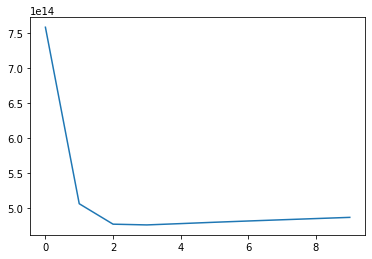

In [187]:
# lossのグラフ
plt.plot(r)

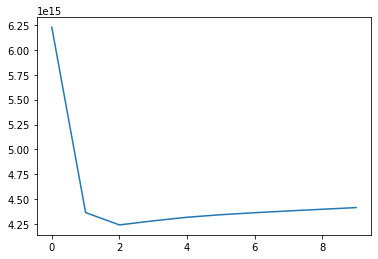

In [188]:
# val_lossのグラフ
plt.plot(q)